In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv


In [11]:
data=pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')

In [12]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
# Step 1: Load your dataset (use the uploaded file's path)
df = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')


In [20]:
#step 2:Generate Summary Statistics

df.describe()  # Mean, std, min, max for numerical columns
df.info()      # Data types and null values
df.isnull().sum()  # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [24]:
print(df.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


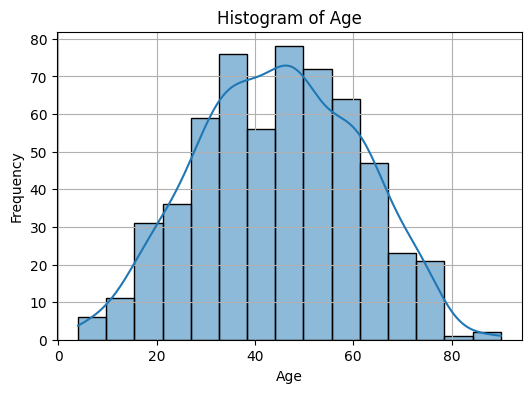

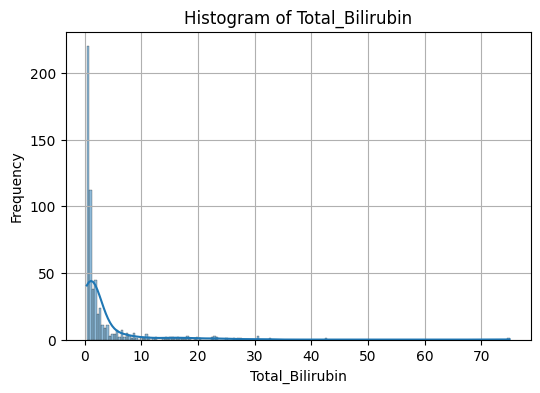

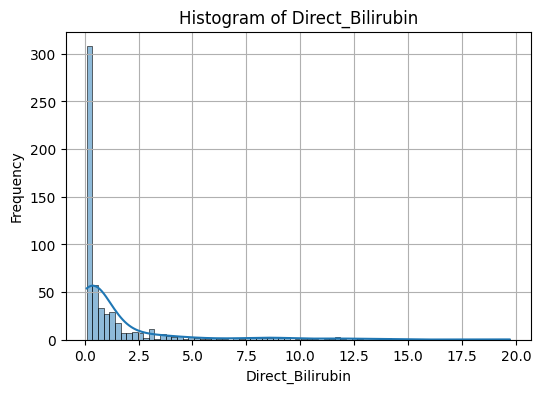

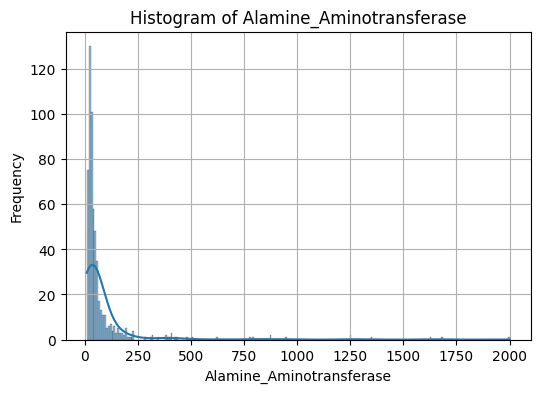

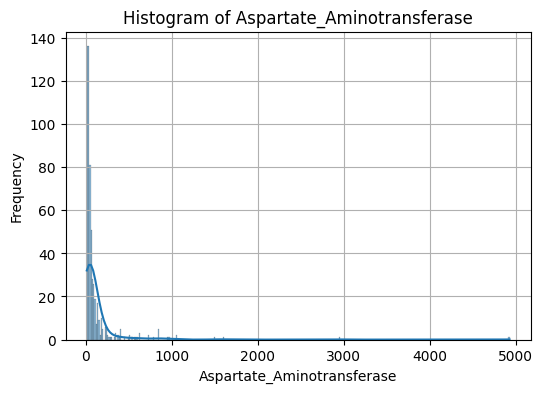

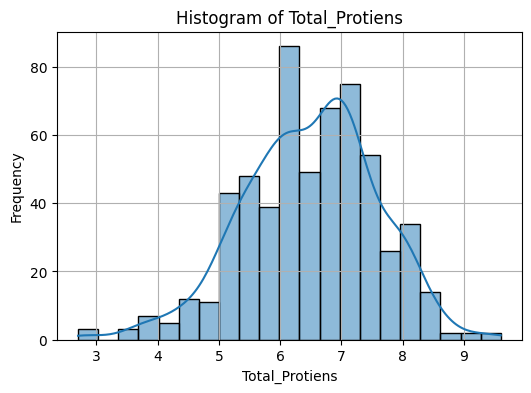

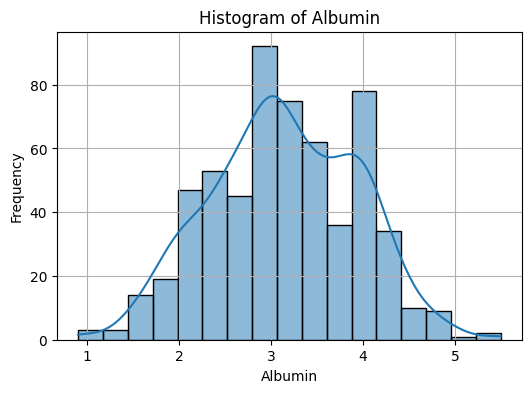

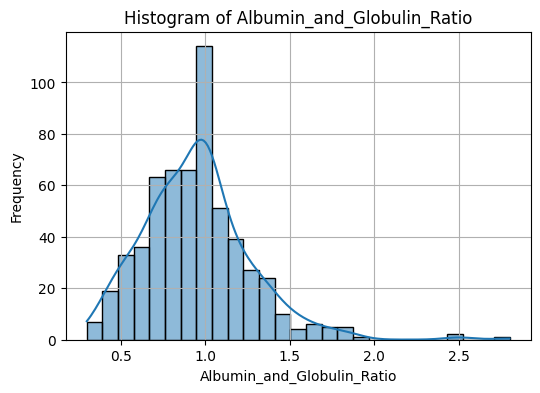

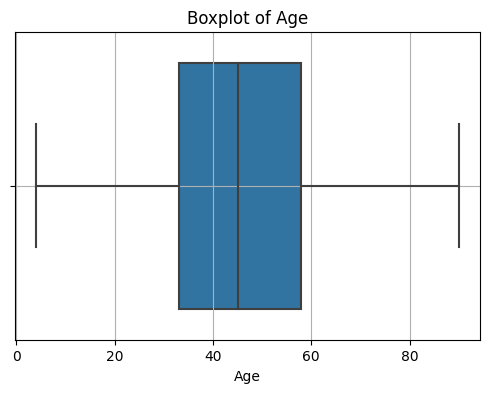

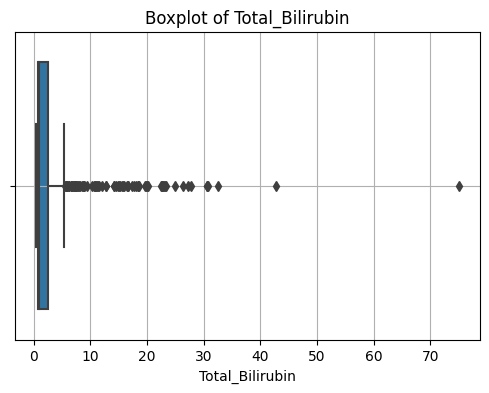

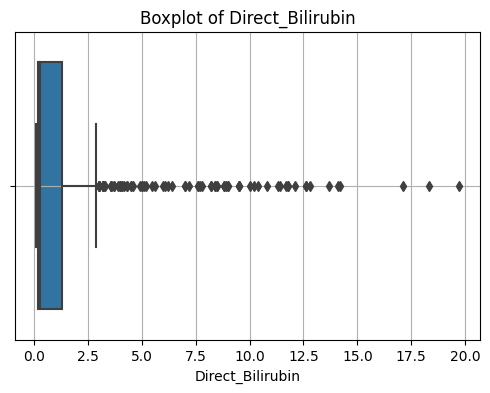

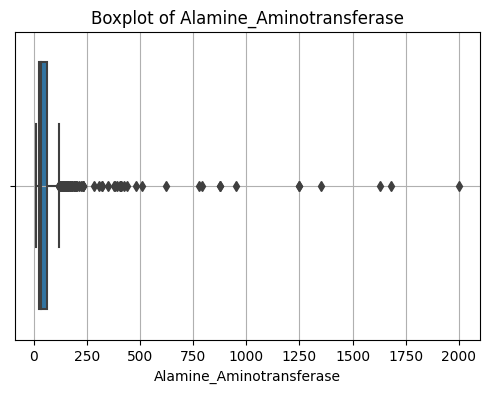

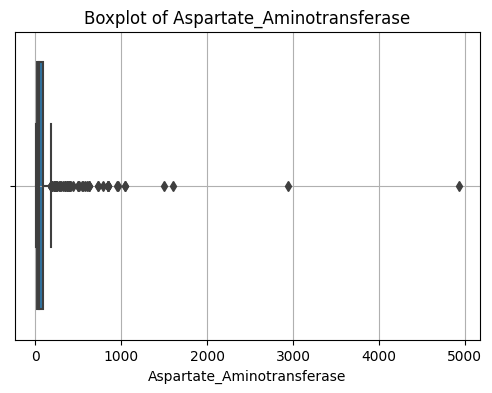

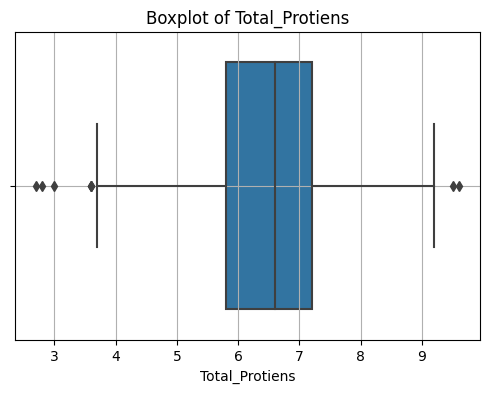

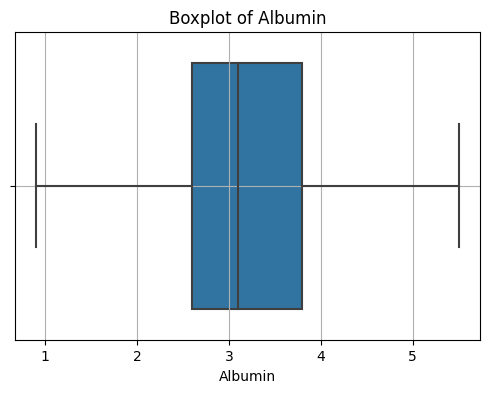

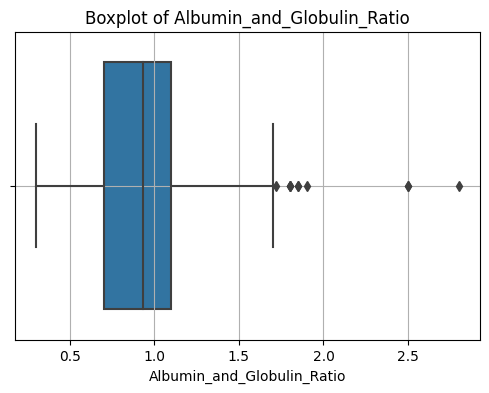

In [35]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# List of numeric columns
numeric_cols = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Protiens',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

# Create histograms for each numeric column

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



# Create boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

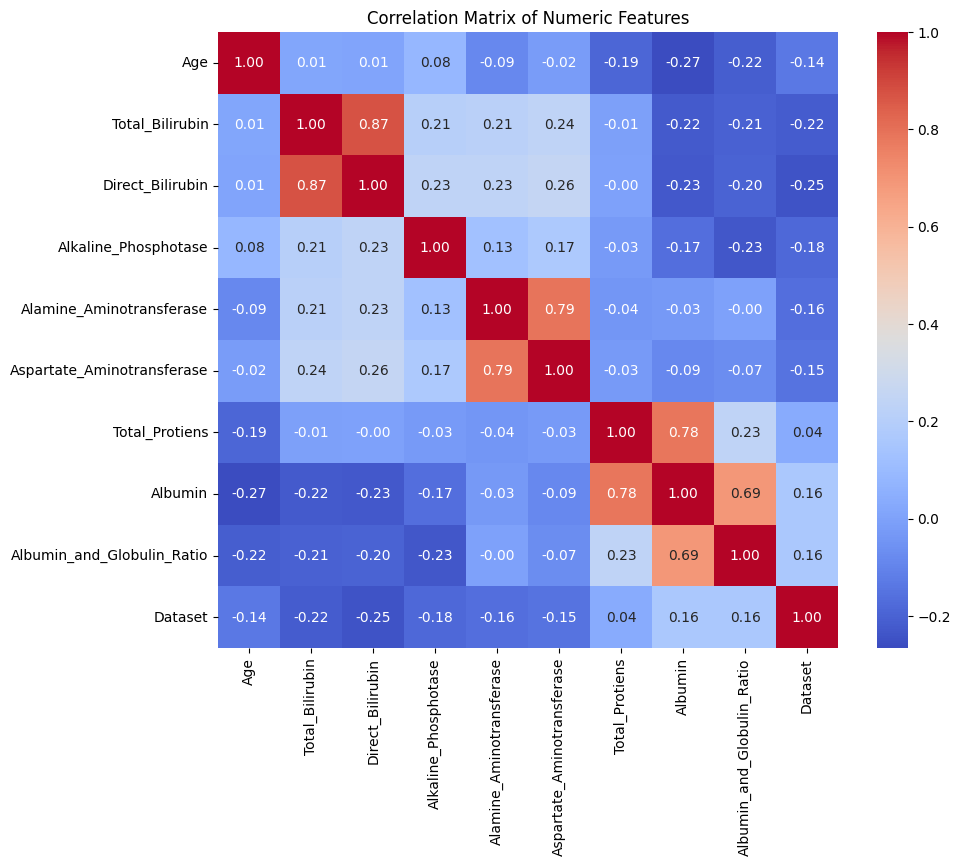

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


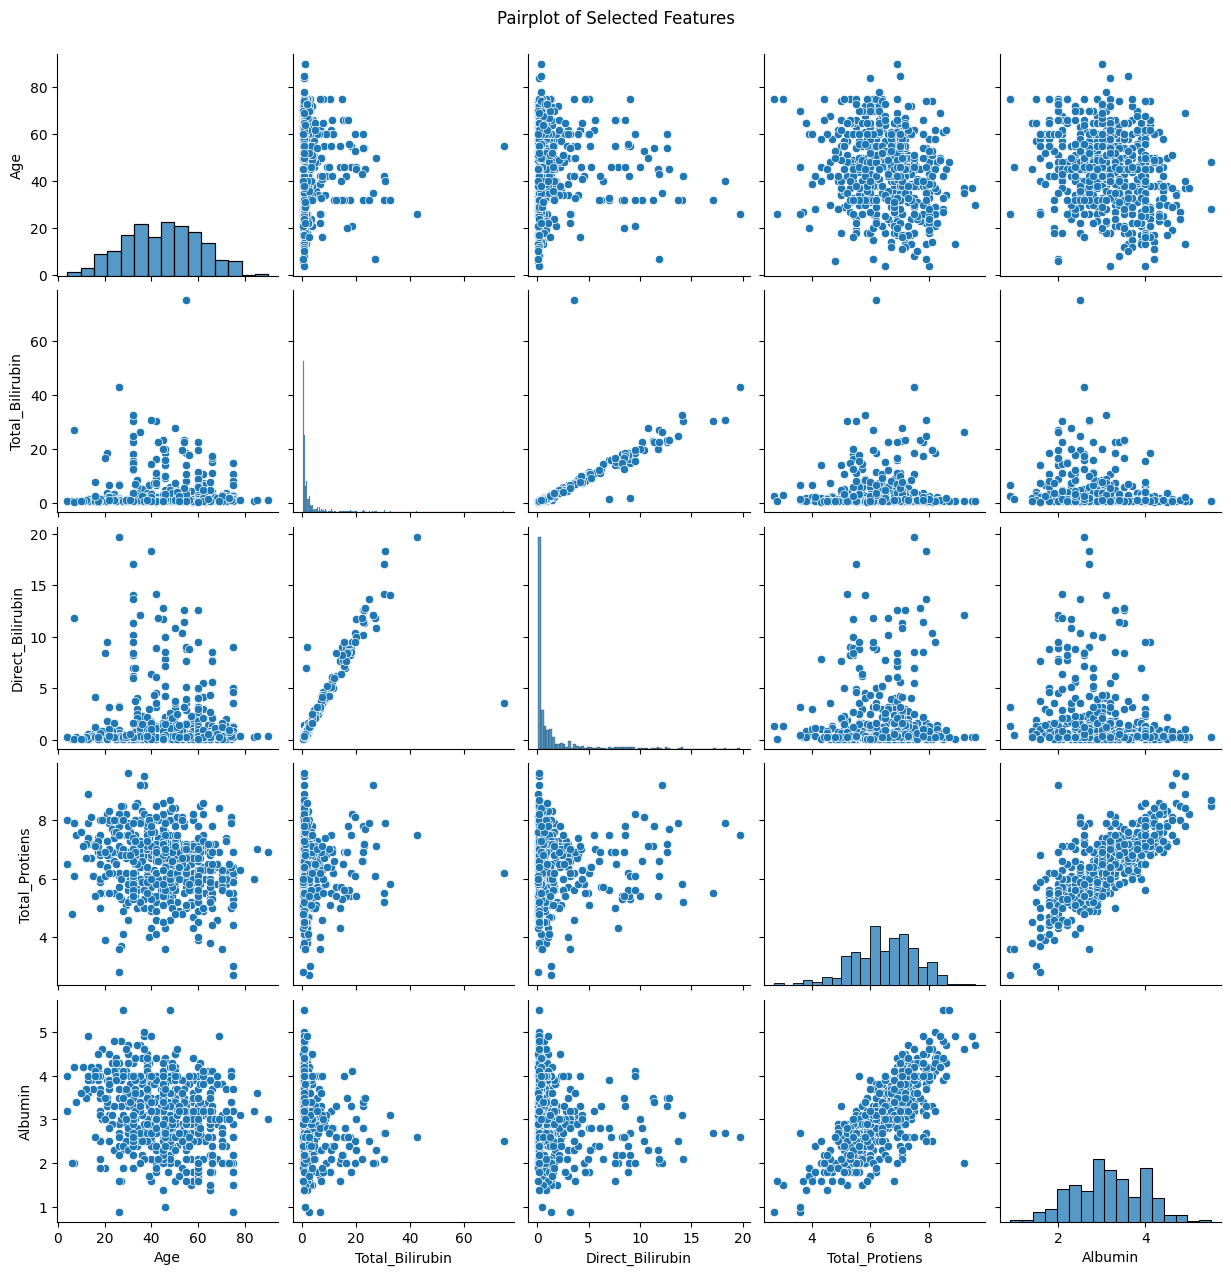

In [43]:
#3. Use Pairplot and Correlation Matrix for Feature Relationships

#A. Correlation Matrix with Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#B. Pairplot

# Optional: include only a few columns to keep it readable
selected_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin']
sns.pairplot(df[selected_cols].dropna())
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

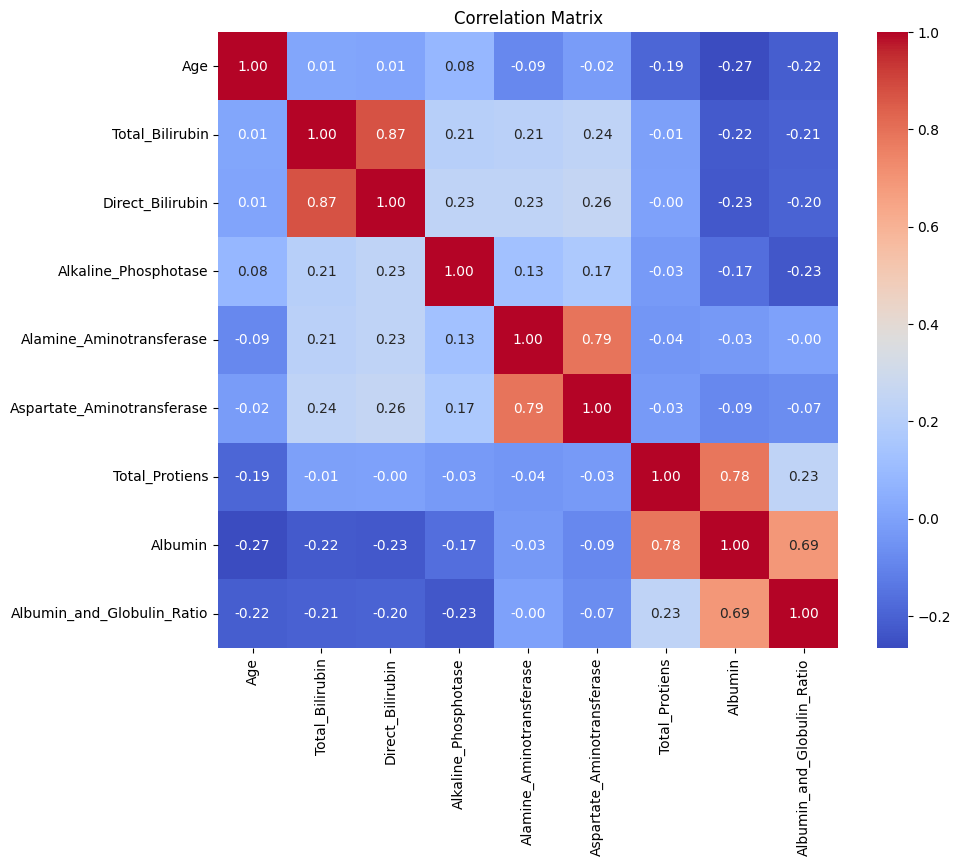

Negative or zero ages:
 Empty DataFrame
Columns: [Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset]
Index: []

Zero bilirubin values:
 Empty DataFrame
Columns: [Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset]
Index: []

Zero protein values:
 Empty DataFrame
Columns: [Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset]
Index: []


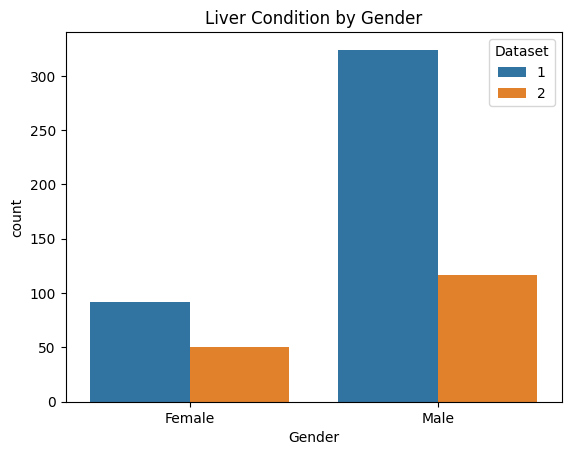

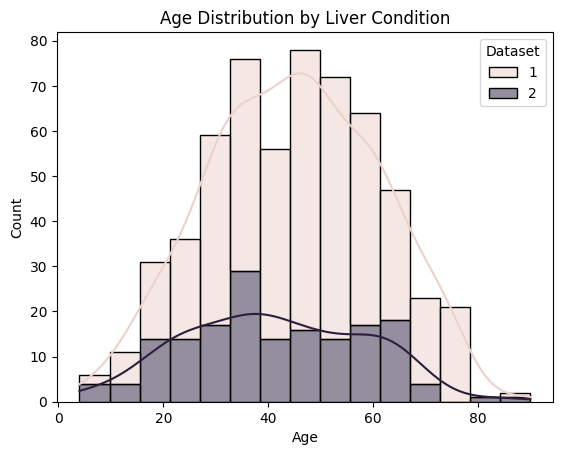

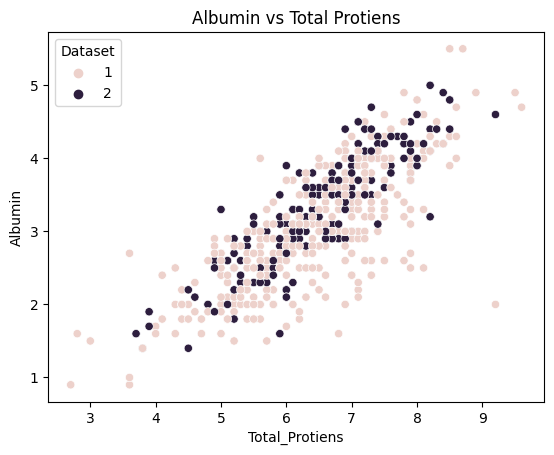

In [49]:
#4. Identify Patterns, Trends, or Anomalies

#A. Correlation Matrix (Heatmap)

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                 'Aspartate_Aminotransferase', 'Total_Protiens',
                 'Albumin', 'Albumin_and_Globulin_Ratio']]

# Compute and plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Check for Anomalies

# Check for negative or zero values
print("Negative or zero ages:\n", df[df['Age'] <= 0])

print("\nZero bilirubin values:\n", df[df['Total_Bilirubin'] == 0])

print("\nZero protein values:\n", df[df['Total_Protiens'] == 0])


#5. Make Basic Feature-Level Inferences from Visuals

#A. Gender vs. Dataset (Liver Condition)

sns.countplot(x='Gender', hue='Dataset', data=df)
plt.title('Liver Condition by Gender')
plt.show()


#B. Age Distribution by Dataset

sns.histplot(data=df, x='Age', hue='Dataset', kde=True, multiple='stack')
plt.title('Age Distribution by Liver Condition')
plt.show()

#C. Albumin vs. Total_Protiens (Relationship Plot)

sns.scatterplot(data=df, x='Total_Protiens', y='Albumin', hue='Dataset')
plt.title('Albumin vs Total Protiens')
plt.show()

